#                  STUDENT PERFORMANCE ANALYSIS

### **PRIMARY OBJECTIVE:**

To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

### **LOADING OF DATASET:**

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('StudentsPerformance.csv')



In [570]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Basic Data Pre-Processing:

In [571]:
df.rename({'race/ethnicity':'race'},axis=1,inplace=True)
df.rename({'parental level of education':'parent'},axis=1,inplace=True)
df.rename({'test preparation course':'tpc'},axis=1,inplace=True)

In [572]:
df.dtypes

gender           object
race             object
parent           object
lunch            object
tpc              object
math score        int64
reading score     int64
writing score     int64
dtype: object

In [573]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 The maximum in all cases is 100 while the minimum score changes.Wwriting score data has more dispersion than the other two. Since the minimum marks are not below zero and maximum marks are 100, the students are graded in 0-100 scale. On initial exploration we find more than half of the students have scored above 60 marks, and their mean in every subject is higher than 65, so the given dataset seems to include a lot of meritorious students.

In [574]:
df[df.duplicated()].count()


gender           0
race             0
parent           0
lunch            0
tpc              0
math score       0
reading score    0
writing score    0
dtype: int64

**No duplicated rows are present**

In [575]:
df.isnull().sum()


gender           0
race             0
parent           0
lunch            0
tpc              0
math score       0
reading score    0
writing score    0
dtype: int64

**No null value is present in the data!**

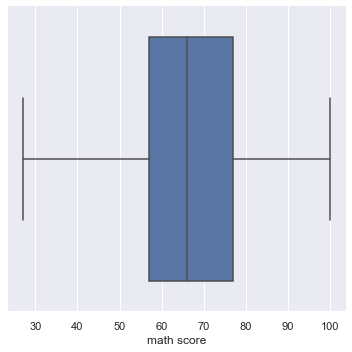

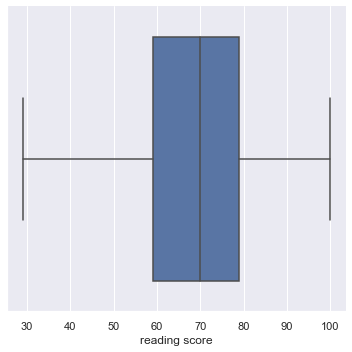

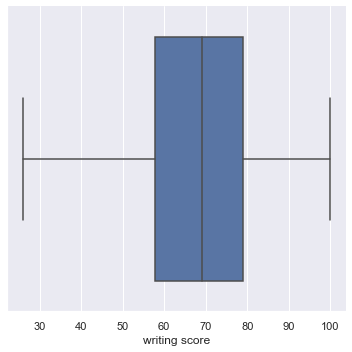

In [576]:
df1=df.copy()
q3=df['math score'].quantile(0.75)
q1=df['math score'].quantile(0.25)
iqr=q3-q1
df.loc[df1['math score']<(q1-(1.5*iqr)),'math score']=(q1-(1.5*iqr))
df.loc[df1['math score']>(q3+(1.5*iqr)),'math score']=(q3+(1.5*iqr))
sns.catplot('math score',data=df,kind='box')
q3=df['reading score'].quantile(0.75)
q1=df['reading score'].quantile(0.25)
iqr=q3-q1
df.loc[df1['reading score']<(q1-(1.5*iqr)),'reading score']=(q1-(1.5*iqr))
df.loc[df1['reading score']>(q3+(1.5*iqr)),'reading score']=(q3+(1.5*iqr))
sns.catplot('reading score',data=df,kind='box')
q3=df['writing score'].quantile(0.75)
q1=df['writing score'].quantile(0.25)
iqr=q3-q1
df.loc[df1['writing score']<(q1-(1.5*iqr)),'writing score']=(q1-(1.5*iqr))
df.loc[df1['writing score']>(q3+(1.5*iqr)),'writing score']=(q3+(1.5*iqr))
sns.catplot('writing score',data=df,kind='box')

**The lower outliers are matched with their lower whisker values and the upper limit outliers are matched with their upper whisker value.**



## **Each column is separately analysed to find how the specific label affects the student's scores:** 

In [577]:
df1.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

female has higher 32 data points higher than the male. However, considering the size of the data set, it is safe to ignore this difference to plot a kde plot. 

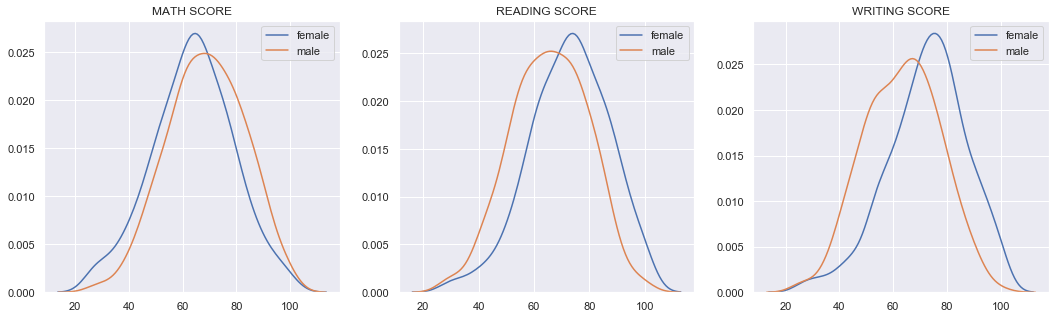

In [635]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.kdeplot(data=df.loc[df['gender']=='female','math score'])
sns.kdeplot(data=df.loc[df['gender']=='male','math score'])
plt.legend(['female','male'])
plt.title('MATH SCORE')

plt.subplot(1,3,2)
sns.kdeplot(data=df.loc[df['gender']=='female','reading score'])
sns.kdeplot(data=df.loc[df['gender']=='male','reading score'])
plt.legend(['female','male'])
plt.title('READING SCORE')

plt.subplot(1,3,3)
sns.kdeplot(data=df.loc[df['gender']=='female','writing score'])
sns.kdeplot(data=df.loc[df['gender']=='male','writing score'])
plt.legend(['female','male'])
plt.title('WRITING SCORE')

plt.show()



The above KDE graphs compares how gender affects the scores of the students.
* From the first graph, it is seen that the female population is concentrated around a score of 65 and the male population has its peak around 70. The male population has a broader cap, indicating more number of students from the male population scores around 60-80 approximately (where its peak lies), while the female population has a sharp tip and so comparitively  less femal students score in their peak range of (55-70). Considering the position of the tips from the y-axis, we find that more number of male students score higher marks than their female counterparts in math!  
* In the second graph, it is seen that the female population is concentrated around a score of 78 and the male population has its peak around 62. The male population has a broader curve, indicating more number of students from the male population scores around 75-80 approximately, while the female population has a sharp tip and so comparitively less femal students score in their peak range of (45-75). Considering the position of the tips from the y-axis, more number of female students score higher marks than their male counterparts in reading!
* In the third graph, it is seen that the female population is concentrated around a score of 78 and the male population has its peak around 64 (similar to the second graph). The male population has a broader curve, indicating more number of students from the male population scores are in their peak range (75-80), while the female population has a sharp tip and so comparitively less femal students score in their peak range of (45-75). Considering the position of the tips from the y-axis, more number of female students score higher marks than their male counterparts in writing!
<br><br>
 ****In general the male students tends to perform slightly better than the female students in math while the female students score more in reading and writing sections comparitively. Thus, male students seems to have slight edge over their female counterparts in logistic skills and vice-versa in reading and writing.****

In [625]:
df.race.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

The data is unevenly distributed

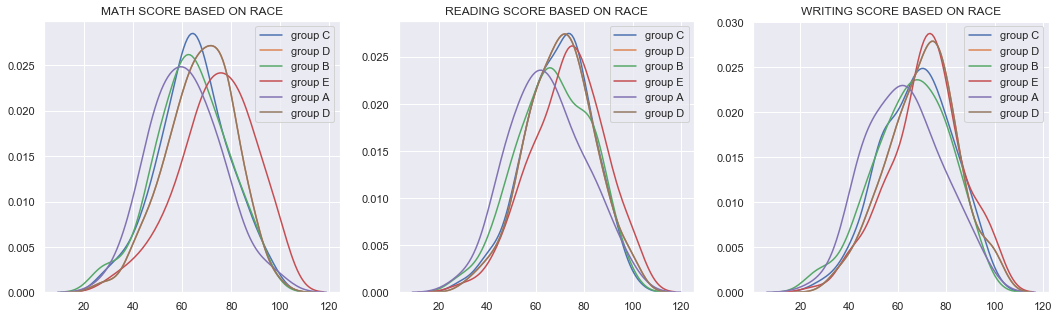

In [626]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.kdeplot(data=df.loc[df['race']=='group C','math score'])
sns.kdeplot(data=df.loc[df['race']=='group D','math score'])
sns.kdeplot(data=df.loc[df['race']=='group B','math score'])
sns.kdeplot(data=df.loc[df['race']=='group E','math score'])
sns.kdeplot(data=df.loc[df['race']=='group A','math score'])
sns.kdeplot(data=df.loc[df['race']=='group D','math score'])
plt.legend(['group C','group D','group B','group E', 'group A','group D'])
plt.title('MATH SCORE BASED ON RACE')

plt.subplot(1,3,2)
sns.kdeplot(data=df.loc[df['race']=='group C','reading score'])
sns.kdeplot(data=df.loc[df['race']=='group D','reading score'])
sns.kdeplot(data=df.loc[df['race']=='group B','reading score'])
sns.kdeplot(data=df.loc[df['race']=='group E','reading score'])
sns.kdeplot(data=df.loc[df['race']=='group A','reading score'])
sns.kdeplot(data=df.loc[df['race']=='group D','reading score'])
plt.legend(['group C','group D','group B','group E', 'group A','group D'])
plt.title('READING SCORE BASED ON RACE')

plt.subplot(1,3,3)
sns.kdeplot(data=df.loc[df['race']=='group C','writing score'])
sns.kdeplot(data=df.loc[df['race']=='group D','writing score'])
sns.kdeplot(data=df.loc[df['race']=='group B','writing score'])
sns.kdeplot(data=df.loc[df['race']=='group E','writing score'])
sns.kdeplot(data=df.loc[df['race']=='group A','writing score'])
sns.kdeplot(data=df.loc[df['race']=='group D','writing score'])
plt.legend(['group C','group D','group B','group E', 'group A','group D'])
plt.title('WRITING SCORE BASED ON RACE')
plt.show()

* Since the data set is unevenly distributed we cannot take into consideration of the height of the curve. The sharpness seems to vary with each ethnic group but not to a very great extent. The important difference seems to be in their skewness. Base on their position of their heads from the y- axis we find that:<br><br>
**MATH SCORES:E>D>C`~`B>A<br>READING: E>C`~`D>B>A<br>WRITING:D>E>C>B>A**<br><br>
Thus in general, students of group E and D perform well comparitively and group A and B underperform compared to their counterparts.

In [627]:
df.parent.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent, dtype: int64

Unevenly distrubuted data

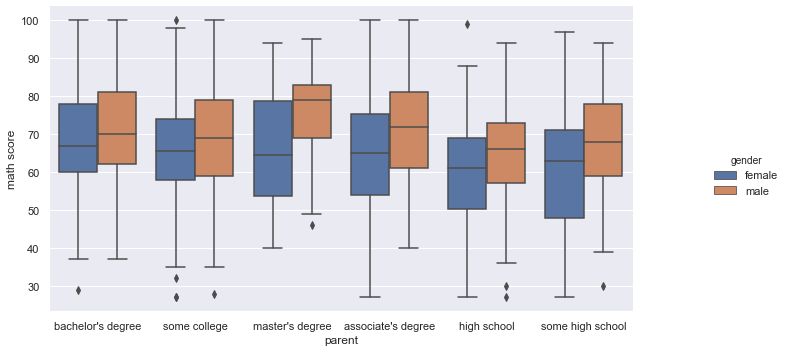

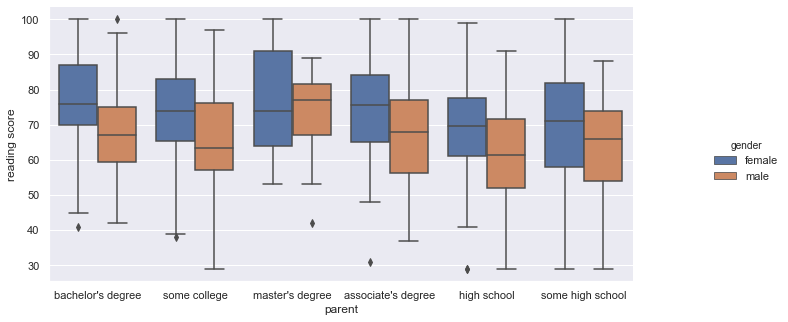

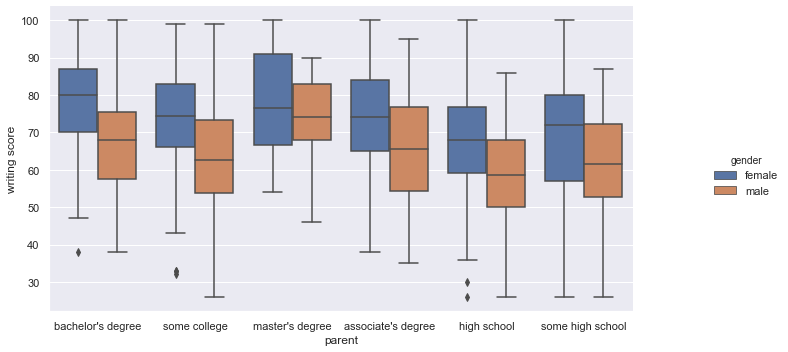

In [630]:
a=sns.catplot(x='parent',y='math score', data=df,hue='gender',kind='box')
a.fig.set_figwidth(12)
a.fig.set_figheight(5)
a=sns.catplot(x='parent',y='reading score', data=df,hue='gender',kind='box')
a.fig.set_figwidth(12)
a.fig.set_figheight(4.5)
a=sns.catplot(x='parent',y='writing score', data=df,hue='gender',kind='box')
a.fig.set_figwidth(12)
a.fig.set_figheight(5)

As earlier boys tend to perform better than girls in maths. Since this is a boxplot, the outliers are also visible which can be ignored easily. The median of majority of the boxes seems to be 60-65 and in lot of cases around 25% (median-Q3) of the students scored above 65 when parent's level of education is higher. Thus, performance of students in math based on their parental education:<br><br>
**<pre>master's degree > bachelor's degree > associate's degree > some college > some high school ~ high school</pre>**<br>
A similar trend is observed in reading and writing scores. The only difference is that girls tend to score better in reading and writing than boys.


In [585]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [586]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

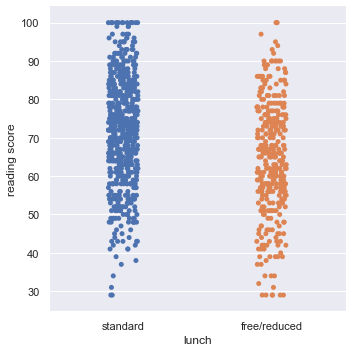

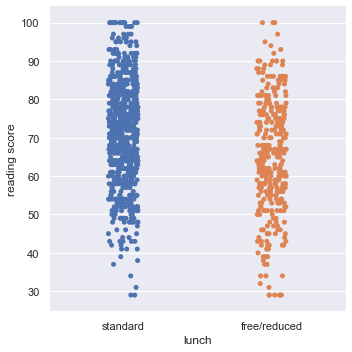

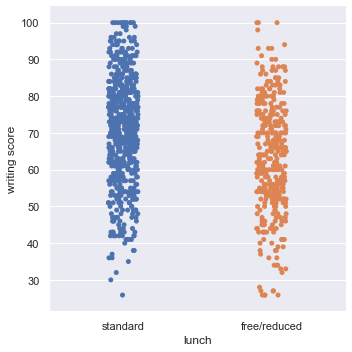

In [679]:

sns.catplot(x='lunch',y='reading score',data=df)
sns.catplot(x='lunch',y='reading score', data=df)
sns.catplot(x='lunch',y='writing score', data=df)

Students taking standard lunch tends to perform better in all the three subjects. The same trends were obtained when we plotted scores against lunch in the categories of gender, race, parental education, test preparation course. So, in general students taking standard lunch perform better at every case.

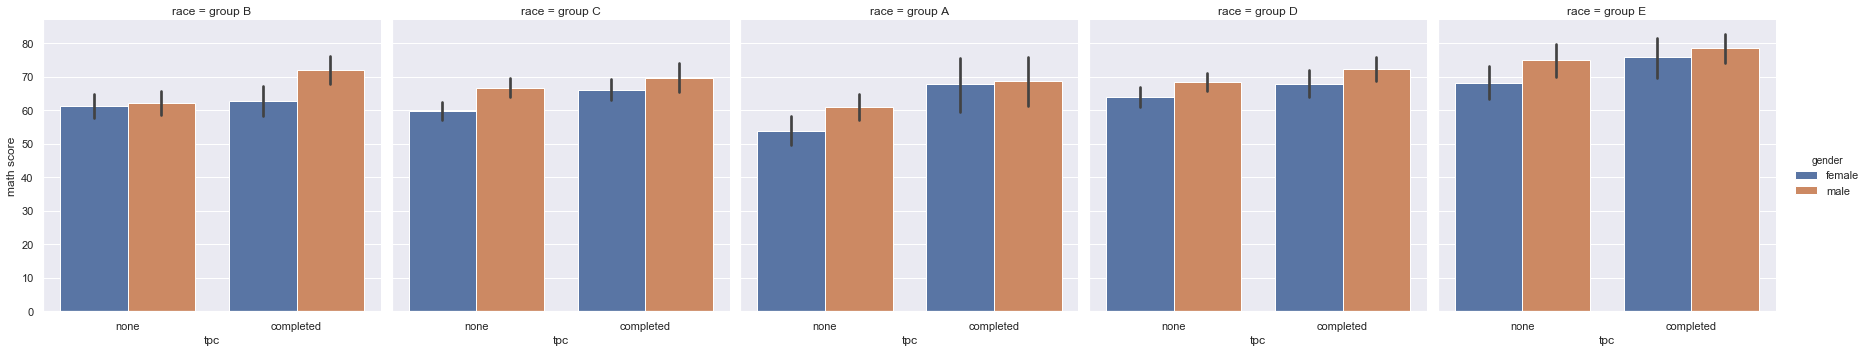

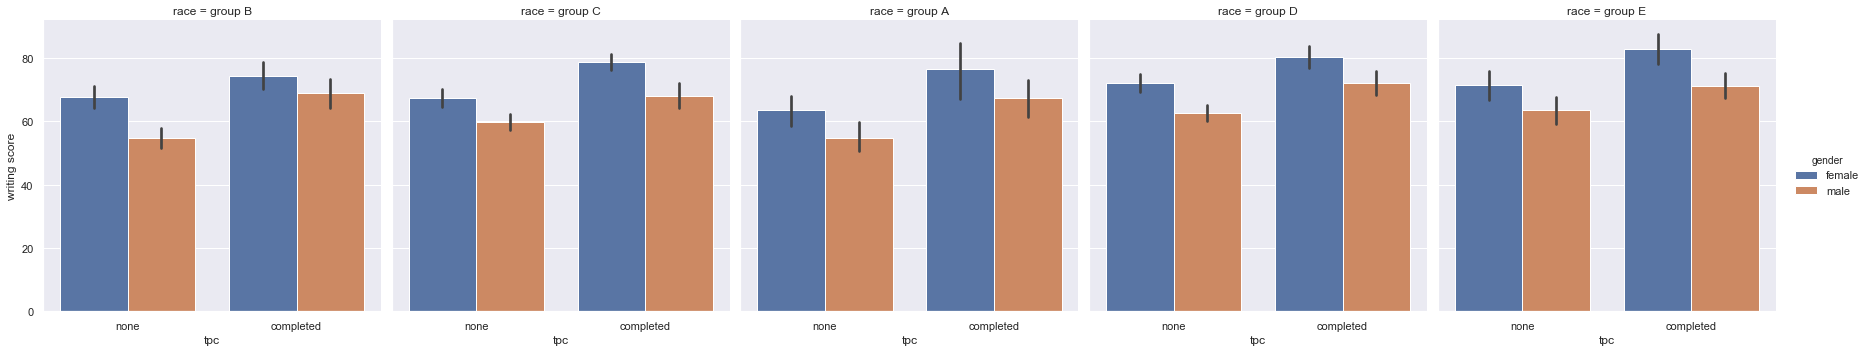

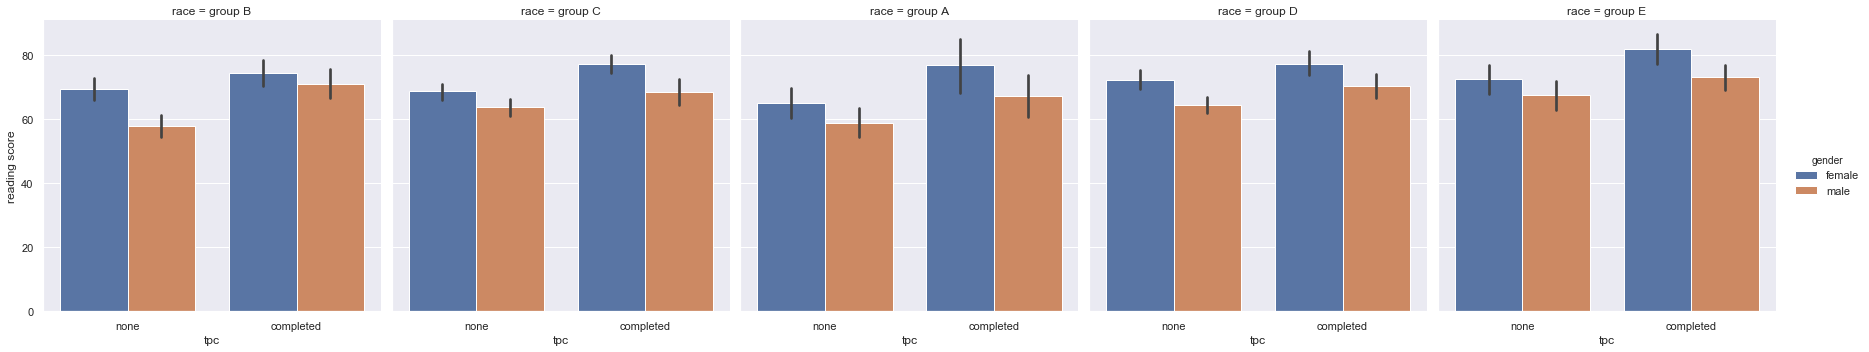

In [633]:
a=sns.catplot(x='tpc',y='math score',hue='gender',col='race',data=df,kind='bar')
a=sns.catplot(x='tpc',y='writing score',hue='gender', col='race',data=df,kind='bar')
a=sns.catplot(x='tpc',y='reading score',hue='gender',col='race', data=df,kind='bar')


It is evident from the graphs that students who had taken the 'test preparation course' performed better than the ones who didn't in both the genders and in all the races.  similar trend was observed in all the 'parental level education' also.<br><br><br> 

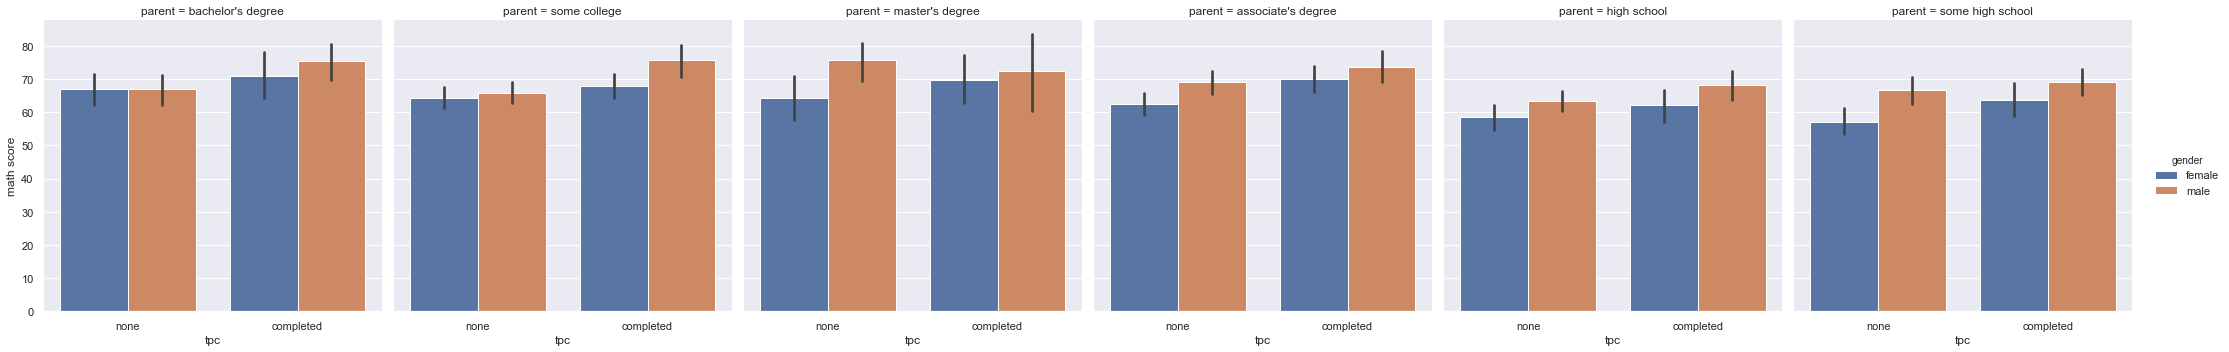

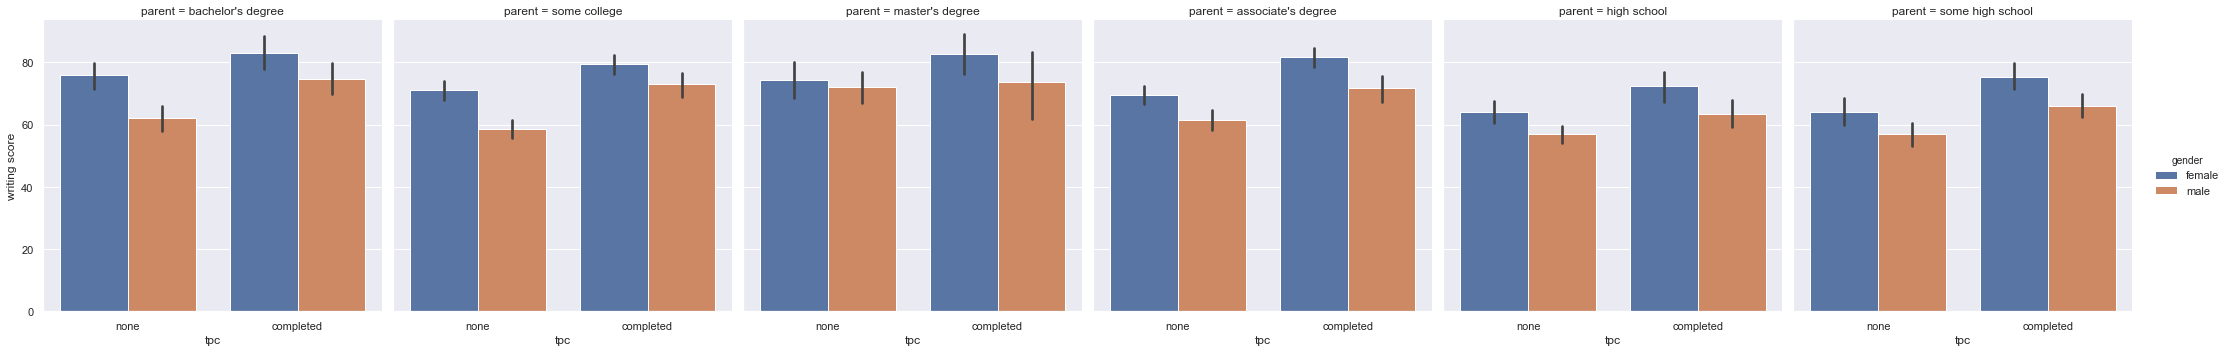

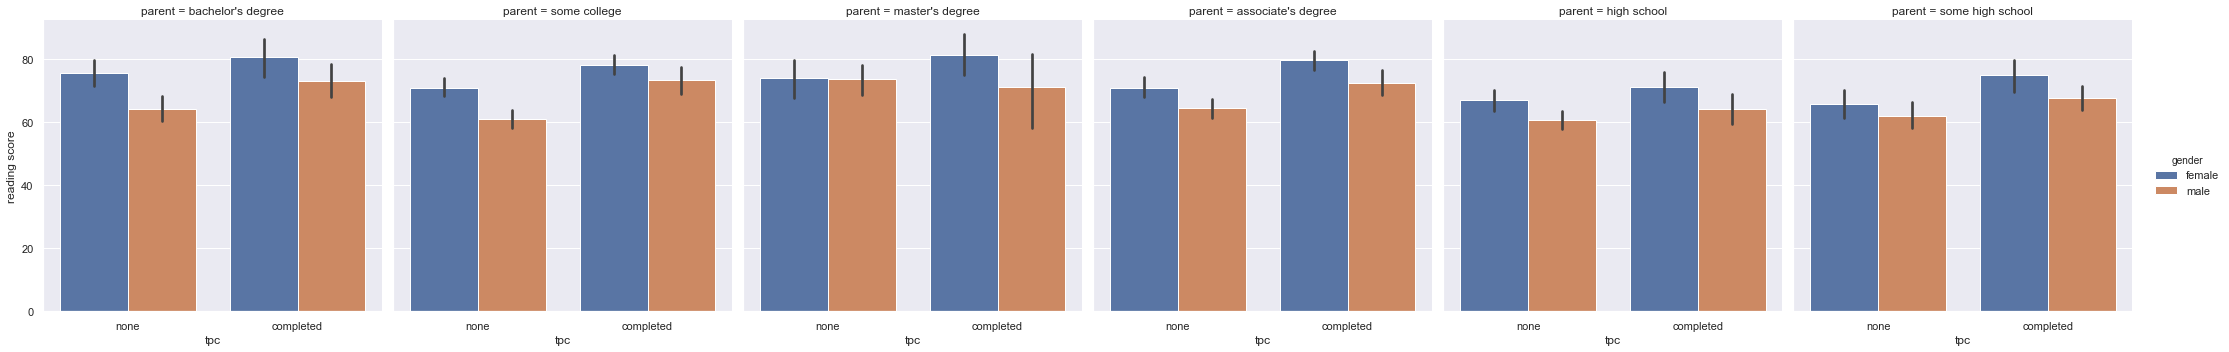

In [634]:
a=sns.catplot(x='tpc',y='math score',hue='gender',col='parent',data=df,kind='bar')
a=sns.catplot(x='tpc',y='writing score',hue='gender', col='parent',data=df,kind='bar')
a=sns.catplot(x='tpc',y='reading score',hue='gender',col='parent', data=df,kind='bar')


## PRIMARY INFERENCES:

* **GENDER:** Boys tend to perform better in mathematic or technical subjects while girls tends to perform in language skills
* **RACE/ETHNICITY:** Group E and Group D students perform well compared to other races in all the three subjects while Group A and Group B underperformed. This might be due to social differences, heredity, average economic status of each race etc.
* **PARENTAL LEVEL OF EDUCATION:** Children of more educated parents(i.e, more degree recipients) perform well comparitively than others. This might be due to several reasons.
<br>* Higher degree recipients, themselves know the importance of education and will be interested in spending more resources on their child's education.
<br>* There is also a possibilty that, more educated parents might be having better-paid jobs(i.e, financial well) and mights spend more on their child's educational resources.<br>* They might be also able to help their children in studies.
* **LUNCH:** Students who opted for standard lunch had performed better than the student's who opted for free/reduced lunch. If we consider that 'more the money, the better the quality' hypothesis, it is seen that standard lunch students might have had more quality or more nutritious lunch that seems to have a positive impact on their academics.
* **TEST PREPARATION COURSE:** Those who have completed the test preparatory course had done much better than those who didn't. This is logical since additional course might help them in their academics.


# Secondary Observations:

### Finding insights when various combinations of attributes are plotted:<br><br>

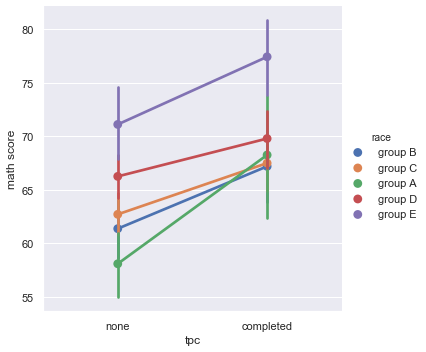

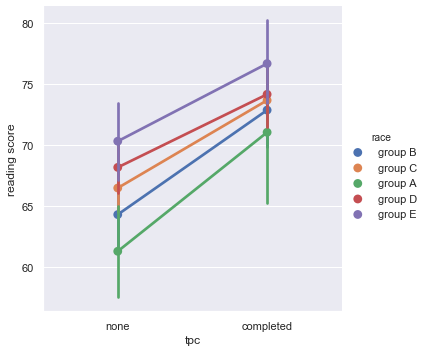

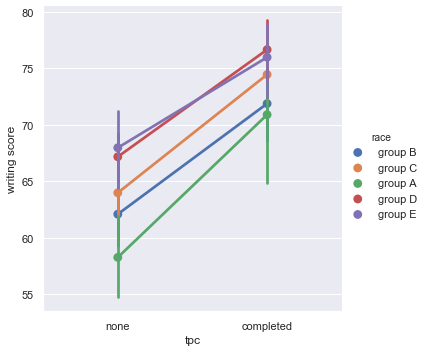

In [592]:
sns.catplot(x='tpc',y='math score',data=df1,hue='race',kind='point')
sns.catplot(x='tpc',y='reading score',data=df1,hue='race',kind='point')
sns.catplot(x='tpc',y='writing score',data=df1,hue='race',kind='point')

On comparing the slopes, from these three graphs it can be seen that the 'test preparation course' had helped students of group A to improve their scores significantly in all the subject end especially in math compared to their counterparts.

race                group A  group B  group C  group D  group E
parent                                                         
associate's degree       14       41       78       50       39
bachelor's degree        12       20       40       28       18
high school              18       48       64       44       22
master's degree           3        6       19       23        8
some college             18       37       69       67       35
some high school         24       38       49       50       18


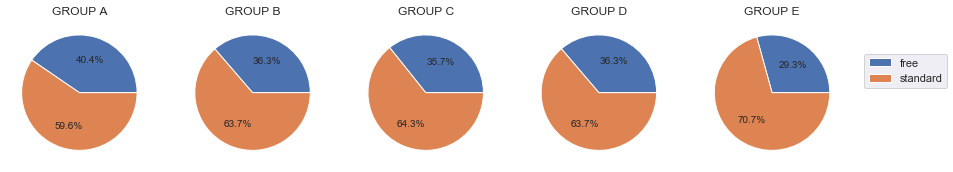

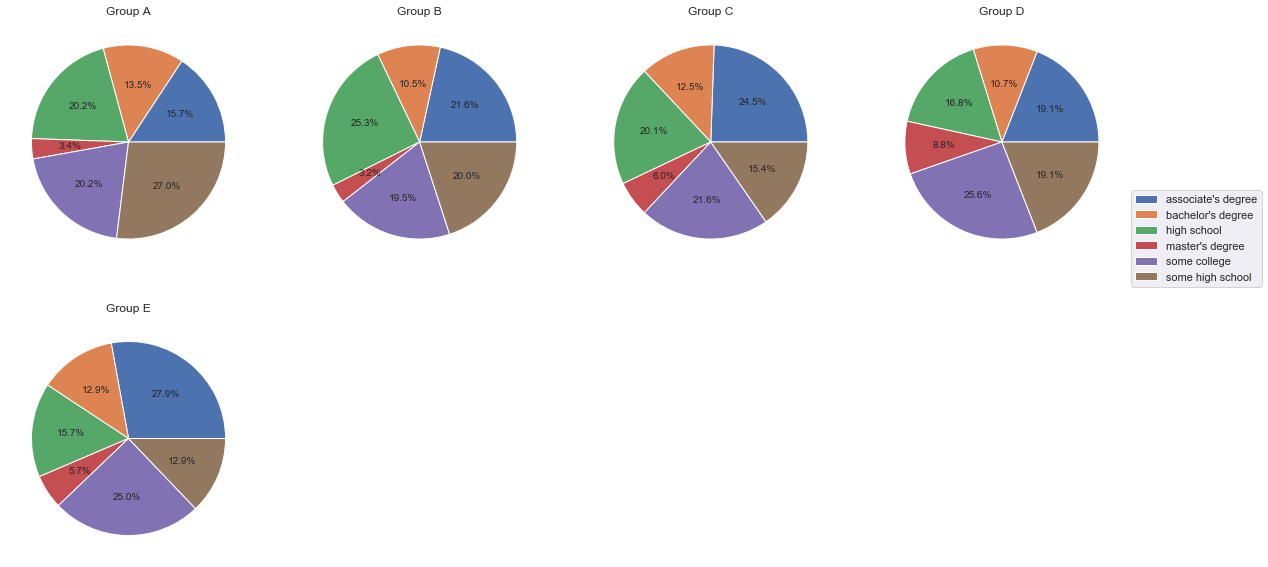

In [727]:
plt.figure(figsize=(15,5))
a=plt.subplot2grid((1,5),(0,0))
k=[]
plt.title('GROUP A')
k.append(df.loc[(df['race']=='group A')&(df['lunch']=='free/reduced'),'gender'].count())
k.append(df.loc[(df['race']=='group A')&(df['lunch']=='standard'),'gender'].count())
a.pie(k,autopct='%1.1f%%')
a=plt.legend(['free','standard'], bbox_to_anchor=(1,0.5), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
b=plt.subplot2grid((1,5),(0,1))
m=[]
plt.title('GROUP B')
m.append(df.loc[(df['race']=='group B')&(df['lunch']=='free/reduced'),'gender'].count())
m.append(df.loc[(df['race']=='group B')&(df['lunch']=='standard'),'gender'].count())
b.pie(m,autopct='%1.1f%%')

c=plt.subplot2grid((1,5),(0,2))
n=[]
plt.title('GROUP C')
n.append(df.loc[(df['race']=='group C')&(df['lunch']=='free/reduced'),'gender'].count())
n.append(df.loc[(df['race']=='group C')&(df['lunch']=='standard'),'gender'].count())
c.pie(n,autopct='%1.1f%%')

d=plt.subplot2grid((1,5),(0,3))
i=[]
plt.title('GROUP D')
i.append(df.loc[(df['race']=='group D')&(df['lunch']=='free/reduced'),'gender'].count())
i.append(df.loc[(df['race']=='group D')&(df['lunch']=='standard'),'gender'].count())
d.pie(i,autopct='%1.1f%%')
e=plt.subplot2grid((1,5),(0,4))
j=[]
plt.title('GROUP E')
j.append(df.loc[(df['race']=='group E')&(df['lunch']=='free/reduced'),'gender'].count())
j.append(df.loc[(df['race']=='group E')&(df['lunch']=='standard'),'gender'].count())
plt.pie(j,autopct='%1.1f%%')


plt.figure(figsize=(20,10))
a=pd.DataFrame(df.pivot_table('tpc',index='parent',columns='race',aggfunc='count'))
print(a)
plt.subplot2grid((2,4),(0,0))
plt.title('Group A')
m=plt.pie(a['group A'], autopct='%1.1f%%')


plt.subplot2grid((2,4),(0,1))
plt.title('Group B')
m=plt.pie(a['group B'], autopct='%1.1f%%')

plt.subplot2grid((2,4),(0,2))
plt.title('Group C')
m=plt.pie(a['group C'], autopct='%1.1f%%')


plt.subplot2grid((2,4),(0,3))
plt.title('Group D')
m=plt.pie(a['group D'], autopct='%1.1f%%')

plt.subplot2grid((2,4),(1,0))
plt.title('Group E')
m=plt.pie(a['group E'], autopct='%1.1f%%')
b=list(a.index)
plt.legend(b)
a=plt.legend(b, bbox_to_anchor=(1,0.5), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)

From the first set of graphs, it can be seen that lower percentage of Group E students have opted for free food and comparitively more the rate is significantly higher in group A.
From the second graph, it is evident that group E students have more educated parents considering the top three degree recipient labels:master's, bachelor's and associates degrees. Group E is followed by group C and then Group D. On the other hand group A tends to have large fraction of population in high school or college labels. Considering the performance of students: E>D>C>B>A, we can correlate the factors with the primary insights.

## SECONDARY INFERENCES:


*  Though the test preparation course increases the performance of every ethnic group, group A seems to be more benefitted.
* Group E has more students opting for standard lunch and more educated parents. This is in proprtion to the student scores. Also group A has more free lunch courses opted and comparitively a large proportion of not so well-educated parents and those students have underperformed comparitively. Similar trends can be followed for other groups also. Thus, the hypothesis<br><br>
**more education = increased probability of higher income** <br><br> have a higher possibilty of success in this case.


### CONCLUDED
